# Modeling and Simulation in Python

Chapter 5

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Reading data

Pandas is a library that provides tools for reading and processing data.  `read_html` reads a web page from a file or the Internet and creates one `DataFrame` for each table on the page.

In [2]:
from pandas import read_html

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

The arguments of `read_html` specify the file to read and how to interpret the tables in the file.  The result, `tables`, is a sequence of `DataFrame` objects; `len(tables)` reports the length of the sequence.

In [3]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

We can select the `DataFrame` we want using the bracket operator.  The tables are numbered from 0, so `tables[2]` is actually the third table on the page.

`head` selects the header and the first five rows.

In [4]:
table2 = tables[2]
table2.head()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`tail` selects the last five rows.

In [5]:
table2.tail()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,7247892788,7.336435e+09,7.349472e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,7325996709,7.418152e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Long column names are awkard to work with, but we can replace them with abbreviated names.

In [6]:
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']

Here's what the DataFrame looks like now.  

In [7]:
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column, which is labeled `Year`, is special.  It is the **index** for this `DataFrame`, which means it contains the labels for the rows.

Some of the values use scientific notation; for example, `2.544000e+09` is shorthand for $2.544 \cdot 10^9$ or 2.544 billion.

`NaN` is a special value that indicates missing data.

### Series

We can use dot notation to select a column from a `DataFrame`.  The result is a `Series`, which is like a `DataFrame` with a single column.

In [8]:
census = table2.census
census.head()

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
Name: census, dtype: int64

In [9]:
census.tail()

Year
2012    7013871313
2013    7092128094
2014    7169968185
2015    7247892788
2016    7325996709
Name: census, dtype: int64

Like a `DataFrame`, a `Series` contains an index, which labels the rows.

`1e9` is scientific notation for $1 \cdot 10^9$ or 1 billion.

From here on, we will work in units of billions.

In [10]:
un = table2.un / 1e9
un.head()

Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
Name: un, dtype: float64

In [11]:
census = table2.census / 1e9
census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: census, dtype: float64

Here's what these estimates look like.

Saving figure to file chap03-fig01.pdf


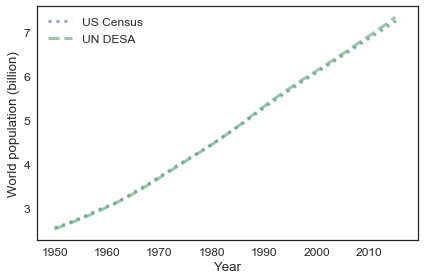

In [12]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year',
         ylabel='World population (billion)')
savefig('chap03-fig01.pdf')

The following expression computes the elementwise differences between the two series, then divides through by the UN value to produce [relative errors](https://en.wikipedia.org/wiki/Approximation_error), then finds the largest element.

So the largest relative error between the estimates is about 1.3%.

In [13]:
max(abs(census - un) / un) * 100

1.3821293828998855

**Exercise:** Break down that expression into smaller steps and display the intermediate results, to make sure you understand how it works.

1.  Compute the elementwise differences, `census - un`
2.  Compute the absolute differences, `abs(census - un)`
3.  Compute the relative differences, `abs(census - un) / un`
4.  Compute the percent differences, `abs(census - un) / un * 100`


In [14]:
diff = census - un

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
1955    0.020448
1956    0.023728
1957    0.028307
1958    0.032107
1959    0.030321
1960    0.016999
1961    0.001137
1962   -0.000978
1963    0.008650
1964    0.017462
1965    0.021303
1966    0.023203
1967    0.021812
1968    0.020639
1969    0.021050
1970    0.021525
1971    0.023573
1972    0.023695
1973    0.022914
1974    0.021304
1975    0.018063
1976    0.014049
1977    0.011268
1978    0.008441
1979    0.007486
          ...   
1987   -0.018115
1988   -0.023658
1989   -0.028560
1990   -0.031861
1991   -0.037323
1992   -0.038763
1993   -0.040597
1994   -0.042404
1995   -0.042619
1996   -0.041576
1997   -0.040716
1998   -0.040090
1999   -0.039403
2000   -0.039129
2001   -0.038928
2002   -0.038837
2003   -0.039401
2004   -0.040006
2005   -0.041050
2006   -0.041964
2007   -0.043192
2008   -0.044599
2009   -0.046508
2010   -0.057599
2011   -0.061999
2012   -0.066201
2013   -0.069991
2014   -0

In [15]:
absdiff = abs (census - un)

Year
1950    0.032480
1951    0.022089
1952    0.017480
1953    0.016188
1954    0.017056
1955    0.020448
1956    0.023728
1957    0.028307
1958    0.032107
1959    0.030321
1960    0.016999
1961    0.001137
1962    0.000978
1963    0.008650
1964    0.017462
1965    0.021303
1966    0.023203
1967    0.021812
1968    0.020639
1969    0.021050
1970    0.021525
1971    0.023573
1972    0.023695
1973    0.022914
1974    0.021304
1975    0.018063
1976    0.014049
1977    0.011268
1978    0.008441
1979    0.007486
          ...   
1987    0.018115
1988    0.023658
1989    0.028560
1990    0.031861
1991    0.037323
1992    0.038763
1993    0.040597
1994    0.042404
1995    0.042619
1996    0.041576
1997    0.040716
1998    0.040090
1999    0.039403
2000    0.039129
2001    0.038928
2002    0.038837
2003    0.039401
2004    0.040006
2005    0.041050
2006    0.041964
2007    0.043192
2008    0.044599
2009    0.046508
2010    0.057599
2011    0.061999
2012    0.066201
2013    0.069991
2014    0

In [16]:
r_absdiff = abs (census - un)/un

Year
1950    0.012862
1951    0.008585
1952    0.006674
1953    0.006072
1954    0.006286
1955    0.007404
1956    0.008439
1957    0.009887
1958    0.011011
1959    0.010208
1960    0.005617
1961    0.000369
1962    0.000311
1963    0.002702
1964    0.005350
1965    0.006399
1966    0.006829
1967    0.006289
1968    0.005827
1969    0.005821
1970    0.005832
1971    0.006258
1972    0.006166
1973    0.005847
1974    0.005332
1975    0.004437
1976    0.003388
1977    0.002670
1978    0.001965
1979    0.001712
          ...   
1987    0.003591
1988    0.004604
1989    0.005461
1990    0.005988
1991    0.006900
1992    0.007054
1993    0.007277
1994    0.007490
1995    0.007423
1996    0.007142
1997    0.006903
1998    0.006709
1999    0.006511
2000    0.006386
2001    0.006274
2002    0.006183
2003    0.006197
2004    0.006216
2005    0.006302
2006    0.006365
2007    0.006473
2008    0.006604
2009    0.006805
2010    0.008328
2011    0.008860
2012    0.009350
2013    0.009772
2014    0

In [17]:
percent_r_absdiff = abs (census - un)/un*100

Year
1950    1.286247
1951    0.858540
1952    0.667365
1953    0.607232
1954    0.628640
1955    0.740425
1956    0.843928
1957    0.988701
1958    1.101054
1959    1.020766
1960    0.561750
1961    0.036871
1962    0.031146
1963    0.270201
1964    0.535045
1965    0.639908
1966    0.682939
1967    0.628856
1968    0.582745
1969    0.582126
1970    0.583151
1971    0.625807
1972    0.616597
1973    0.584666
1974    0.533223
1975    0.443692
1976    0.338849
1977    0.266959
1978    0.196499
1979    0.171246
          ...   
1987    0.359053
1988    0.460423
1989    0.546078
1990    0.598794
1991    0.690025
1992    0.705441
1993    0.727689
1994    0.749047
1995    0.742263
1996    0.714242
1997    0.690252
1998    0.670935
1999    0.651132
2000    0.638560
2001    0.627448
2002    0.618347
2003    0.619705
2004    0.621627
2005    0.630170
2006    0.636478
2007    0.647257
2008    0.660376
2009    0.680460
2010    0.832811
2011    0.885957
2012    0.935034
2013    0.977243
2014    1

`max` and `abs` are built-in functions provided by Python, but NumPy also provides version that are a little more general.  When you import `modsim`, you get the NumPy versions of these functions.

### Constant growth

We can select a value from a `Series` using bracket notation.  Here's the first element:

In [18]:
census[1950]

2.557628654

And the last value.

In [19]:
census[2016]

7.325996709

But rather than "hard code" those dates, we can get the first and last labels from the `Series`:

In [20]:
t_0 = get_first_label(census)

1950

In [21]:
t_end = get_last_label(census)

2016

In [22]:
elapsed_time = t_end - t_0

66

And we can get the first and last values:

In [23]:
p_0 = get_first_value(census)

2.557628654

In [24]:
p_end = get_last_value(census)

7.325996709

Then we can compute the average annual growth in billions of people per year.

In [25]:
total_growth = p_end - p_0

4.768368055

In [26]:
annual_growth = total_growth / elapsed_time

0.07224800083333333

### TimeSeries

Now let's create a `TimeSeries` to contain values generated by a linear growth model.

In [27]:
results = TimeSeries()

,values


Initially the `TimeSeries` is empty, but we can initialize it so the starting value, in 1950, is the 1950 population estimated by the US Census.

In [28]:
results[t_0] = census[t_0]
results

,values
1950,2.557629


After that, the population in the model grows by a constant amount each year.

In [29]:
for t in linrange(t_0, t_end-1):
    results[t+1] = results[t] + annual_growth

`linrange` is defined in the `modsim` library.  It is similar to `linspace`, but instead of taking parameters `start`, `stop`, and `num`, it takes `start`, `stop`, and `step`.

In [30]:
help(linrange)

Help on function linrange in module modsim:

linrange(start=0, stop=None, step=1, **options)
    Returns an array of evenly-spaced values in the interval [start, stop].
    
    This function works best if the space between start and stop
    is divisible by step; otherwise the results might be surprising.
    
    By default, the last value in the array is `stop` (at least approximately).
    If you provide the keyword argument `endpoint=False`, the last value
    in the array is `stop-step`.
    
    start: first value
    stop: last value
    step: space between values
    
    Also accepts the same keyword arguments as np.linspace.  See
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html
    
    returns: array or Quantity



Here's what the results looks like, compared to the actual data.

Saving figure to file chap03-fig02.pdf


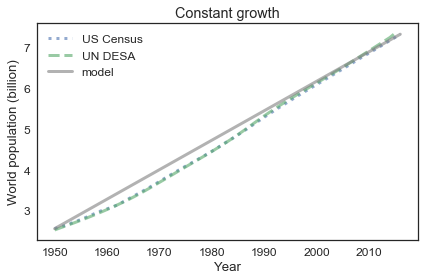

In [31]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')
savefig('chap03-fig02.pdf')

The model fits the data pretty well after 1990, but not so well before.

### Exercises

**Optional Exercise:**  Try fitting the model using data from 1970 to the present, and see if that does a better job.

Hint: 

1. Copy the code from above and make a few changes.  Test your code after each small change.

2. Make sure your `TimeSeries` starts in 1950, even though the estimated annual growth is based on later data.

3. You might want to add a constant to the starting value to match the data better.

In [36]:
elapsed_time = t_end - (t_0 + 20)
print('Elapsed time is ',elapsed_time)
total_growth = p_end - (census[t_0+20])
print('Total growth is ',total_growth)
annual_growth = total_growth / elapsed_time
print('Annual growth is ',annual_growth)

Elapsed time is  46
Total growth is  3.613298967
Annual growth is  0.07854997754347826


In [37]:
for t in linrange(t_0+20, t_end-1):
    results[t+1] = results[t] + annual_growth

Saving figure to file chap03-minefig02.pdf


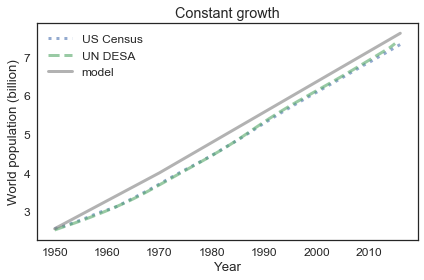

In [38]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')
savefig('chap03-minefig02.pdf')

In [35]:
p_0

2.557628654